# Estudio de tipos de trabajo

## 1. Cargando datos

In [176]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (10, 6)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [177]:
df_postulantes_educacion = pd.read_csv("../Data/fiuba_1_postulantes_educacion.csv", low_memory=False)
df_postulantes_genero_y_edad = pd.read_csv("../Data/fiuba_2_postulantes_genero_y_edad.csv", low_memory=False)
df_vistas = pd.read_csv("../Data/fiuba_3_vistas.csv", low_memory=False)
df_postulaciones = pd.read_csv("../Data/fiuba_4_postulaciones.csv", low_memory=False)
df_aviso_online = pd.read_csv("../Data/fiuba_5_avisos_online.csv", low_memory=False)
df_avisos_detalle = pd.read_csv("../Data/fiuba_6_avisos_detalle.csv", low_memory=False)

# 2. Tipos de trabajos

In [178]:
datos = df_avisos_detalle['tipo_de_trabajo'].value_counts()

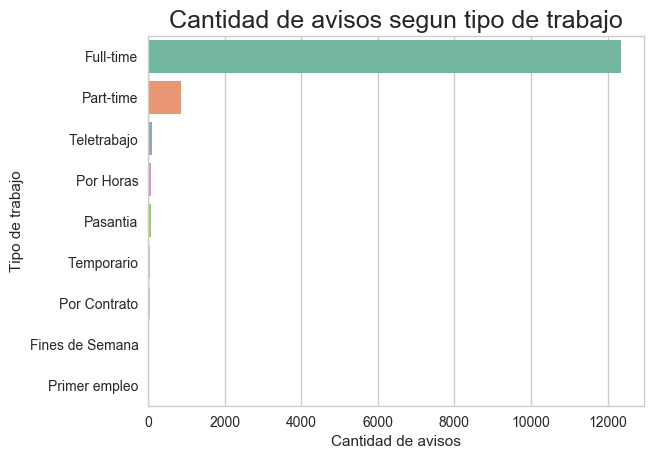

In [179]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette("Set2", 10))
g.set_title('Cantidad de avisos segun tipo de trabajo', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Tipo de trabajo');

Se puede observar que el tipo de trabajo principal es el full-time y luego bastante detras viene Part-time. Respecto a los demas su cantidad es minima.

In [180]:
datos = df_avisos_detalle[-df_avisos_detalle['tipo_de_trabajo'].isin(['Full-time', 'Part-time'])]['tipo_de_trabajo'].value_counts()

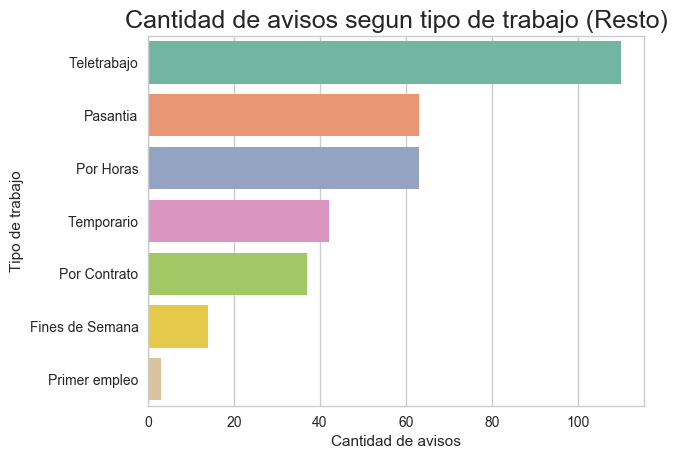

In [181]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette("Set2", 10))
g.set_title('Cantidad de avisos segun tipo de trabajo (Resto)', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Tipo de trabajo');

Se observa una gran cantidad de avisos por teletrabajo y luego pasantia con por horas estan a la par.

# 3. Tipos de trabajo segun area

In [182]:
df_avisos_detalle_ft = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Full-time']
df_avisos_detalle_pt = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Part-time']

## 3.1 Areas con trabajo Full-time

In [183]:
datos = df_avisos_detalle_ft['nombre_area'].value_counts().head(10)

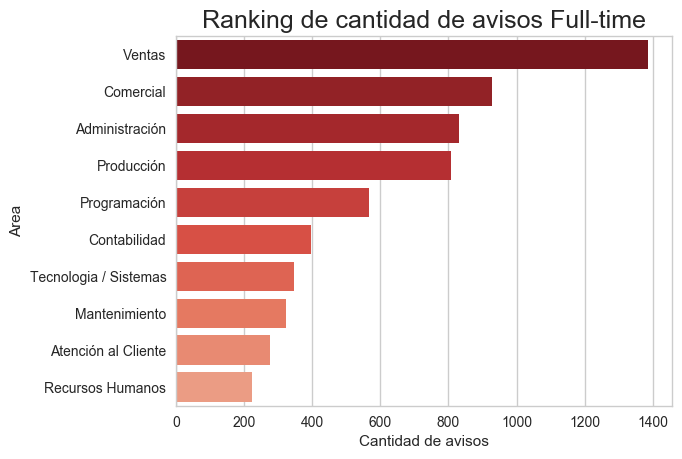

In [184]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Reds_r', 15))
g.set_title('Ranking de cantidad de avisos Full-time', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

Podemos ver que las areas que mas vienen apariciendo en este tp son precisamente las que tienen mas avisos del tipo full-time

## 3.2 Areas de trabajo Part-time

In [185]:
datos = df_avisos_detalle_pt['nombre_area'].value_counts().head(10)

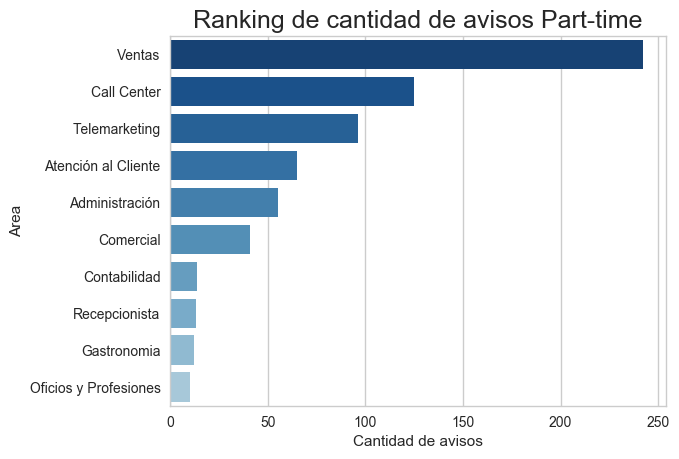

In [186]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Blues_r', 15))
g.set_title('Ranking de cantidad de avisos Part-time', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

A diferencia de full-time, en part-time callcenter, telemarketing y atencion al cliente influyen mucho mas.

## 3.3 Areas Teletrabajo

In [187]:
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Teletrabajo']['nombre_area'].value_counts().head(10)

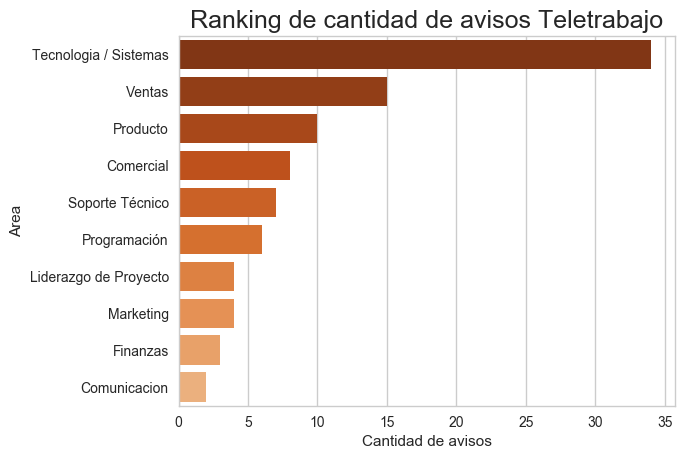

In [188]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Oranges_r', 15))
g.set_title('Ranking de cantidad de avisos Teletrabajo', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

## 3.4 Area Pasantia

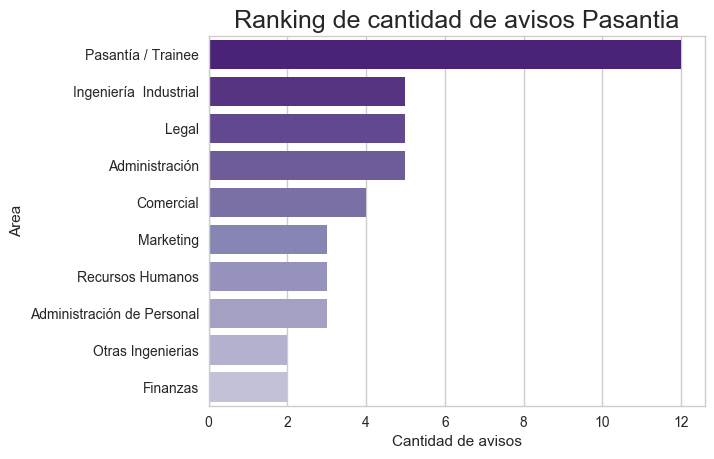

In [189]:
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Pasantia']['nombre_area'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Purples_r', 15))
g.set_title('Ranking de cantidad de avisos Pasantia', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

## 3.5 Area Por horas

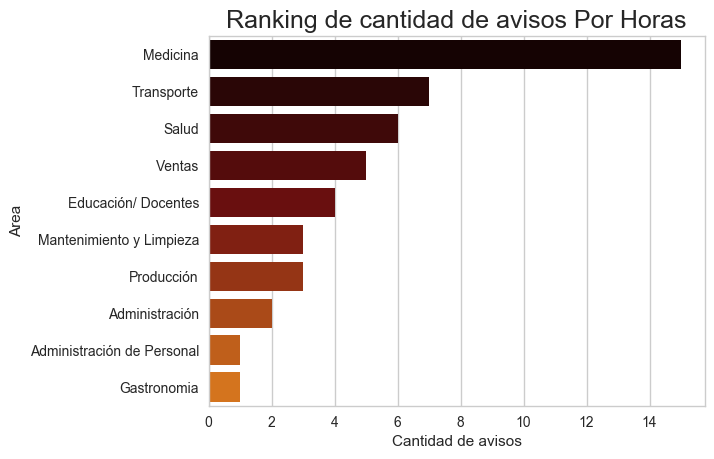

In [190]:
area = 'Por Horas'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == area]['nombre_area'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('afmhot', 20))
g.set_title('Ranking de cantidad de avisos {}'.format(area), fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

# 3.6 Temporario

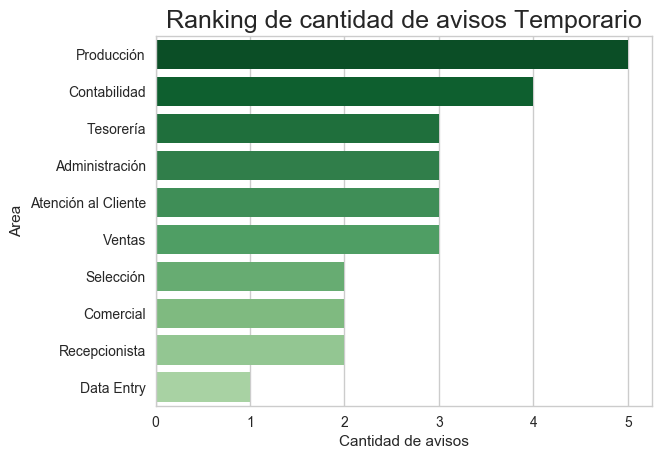

In [191]:
area = 'Temporario'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == area]['nombre_area'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Greens_r', 15))
g.set_title('Ranking de cantidad de avisos {}'.format(area), fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

## 3.7 Por contrato

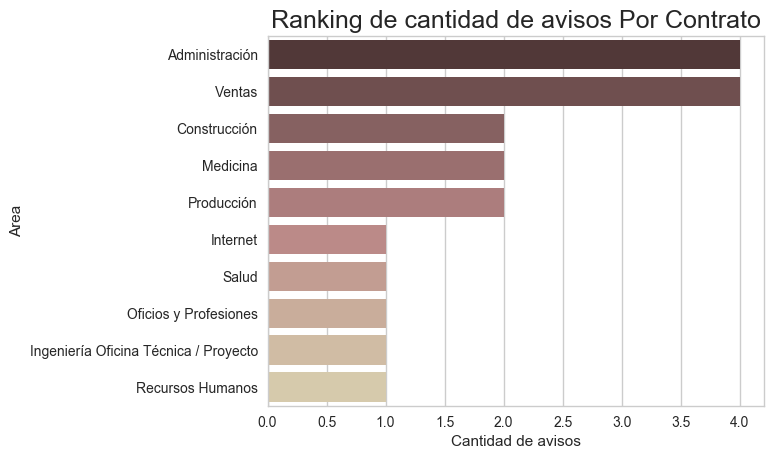

In [192]:
area = 'Por Contrato'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == area]['nombre_area'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('pink', 15))
g.set_title('Ranking de cantidad de avisos {}'.format(area), fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

## 3.8 Resumen

In [193]:
df_avisos_no_pt_ft['nivel'] = 1

In [194]:
df_areas_ppales = df_avisos_no_pt_ft[
    df_avisos_no_pt_ft['nombre_area'].isin(['Ventas', 'Tecnología', 'Comercial', 'Legal', 'Administración', 
                                            'Producción', 'Medicina', 'Contabilidad', 'Construcción', 'Sistemas',
                                            'Programación', 'Transporte'])
    | (df_avisos_no_pt_ft['nombre_area'].str.contains('Industrial'))
    | (df_avisos_no_pt_ft['nombre_area'].str.contains('Trainee'))
]

In [195]:
tabla = df_areas_ppales[['nombre_area', 'tipo_de_trabajo', 'nivel']].pivot_table(
    index='nombre_area', columns='tipo_de_trabajo', values='nivel', aggfunc='sum'
)

In [196]:
tabla

tipo_de_trabajo,Fines de Semana,Pasantia,Por Contrato,Por Horas,Primer empleo,Teletrabajo,Temporario
nombre_area,,,,,,,
Administración,NaN,5.0,4.0,2.0,NaN,NaN,3.0
Comercial,NaN,4.0,NaN,1.0,NaN,8.0,2.0
Construcción,NaN,NaN,2.0,NaN,NaN,NaN,1.0
Contabilidad,NaN,NaN,1.0,NaN,NaN,NaN,4.0
Ingeniería Industrial,NaN,5.0,NaN,NaN,NaN,NaN,1.0
Legal,NaN,5.0,1.0,1.0,NaN,NaN,NaN
Medicina,1.0,NaN,2.0,15.0,NaN,NaN,1.0
Pasantía / Trainee,NaN,12.0,NaN,NaN,NaN,NaN,NaN
Producción,NaN,1.0,2.0,3.0,NaN,NaN,5.0


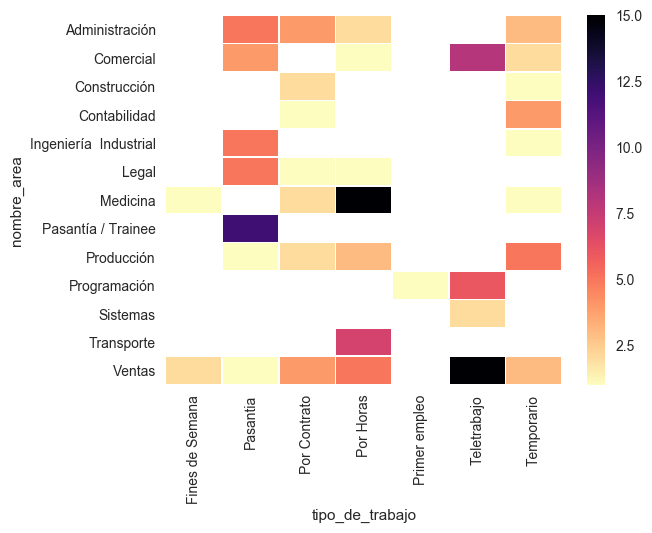

In [197]:
g = sns.heatmap(tabla, cmap='magma_r', linewidths=0.5)

## 4. Segun sexo

In [198]:
df_postulantes_genero_y_edad_sinnodeclara =df_postulantes_genero_y_edad[df_postulantes_genero_y_edad['sexo'] != 'NO_DECLARA']

In [199]:
df_postulacines_sexo = pd.merge(df_postulantes_genero_y_edad_sinnodeclara, df_postulaciones, on='idaviso', how='inner')

KeyError: 'idaviso'